In [1]:
from pathlib import Path
import pickle
import glob
import os
from models import CTCNet
from utils import create_data_loaders
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

/Users/patmccarthy/miniconda3/envs/thalamocortex/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load results

In [5]:
results_paths = {
    # "driver_MNIST": "/Users/patmccarthy/Documents/thalamocortex/results/13_02_24_driver_mnist_lr_explore/1_CTCNet_TC_add_reciprocal_readout",
    "driver_FashionMNIST": "/Users/patmccarthy/Documents/thalamocortex/results/18_02_24_driver_fashionmnist/0_CTCNet_TC_add_reciprocal_readout",
    # "mod1_MNIST": "/Users/patmccarthy/Documents/thalamocortex/results/13_02_24_mod1_mnist_lr_explore/1_CTCNet_TC_multi_pre_activation_reciprocal",
    "mod1_FashionMNIST": "/Users/patmccarthy/Documents/thalamocortex/results/18_02_24_mod1_fashionmnist/0_CTCNet_TC_multi_pre_activation_reciprocal",
    # "mod2_MNIST": "/Users/patmccarthy/Documents/thalamocortex/results/13_02_24_mod2_mnist_lr_explore/1_CTCNet_TC_multi_post_activation_reciprocal",
    "mod2_FashionMNIST": "/Users/patmccarthy/Documents/thalamocortex/results/18_02_24_mod2_fashionmnist/0_CTCNet_TC_multi_post_activation_reciprocal"
}

In [6]:
results_paths

{'driver_FashionMNIST': '/Users/patmccarthy/Documents/thalamocortex/results/18_02_24_driver_fashionmnist/0_CTCNet_TC_add_reciprocal_readout',
 'mod1_FashionMNIST': '/Users/patmccarthy/Documents/thalamocortex/results/18_02_24_mod1_fashionmnist/0_CTCNet_TC_multi_pre_activation_reciprocal',
 'mod2_FashionMNIST': '/Users/patmccarthy/Documents/thalamocortex/results/18_02_24_mod2_fashionmnist/0_CTCNet_TC_multi_post_activation_reciprocal'}

Final validation losses

In [7]:
results = {}
for model_name, path in results_paths.items():
    
    # learning progress
    
    with open(Path(f"{path}", "learning.pkl"), "rb") as handle:
        learning = pickle.load(handle)

    results[model_name] = {"val_losses": learning["val_losses"],
                           "train_losses": learning["train_losses"],
                           "train_time": learning["train_time"]}

In [8]:
learning.keys()

dict_keys(['train_losses', 'val_losses', 'final_val_losses', 'state_dicts', 'train_time'])

In [9]:
results.keys()

dict_keys(['driver_FashionMNIST', 'mod1_FashionMNIST', 'mod2_FashionMNIST'])

In [10]:
# model_plot_list = ["driverMNIST", "mod1_MNIST", "mod2_MNIST"]
model_plot_list = ["driver_FashionMNIST", "mod1_FashionMNIST", "mod2_FashionMNIST"]

Text(0.5, 0, 'model')

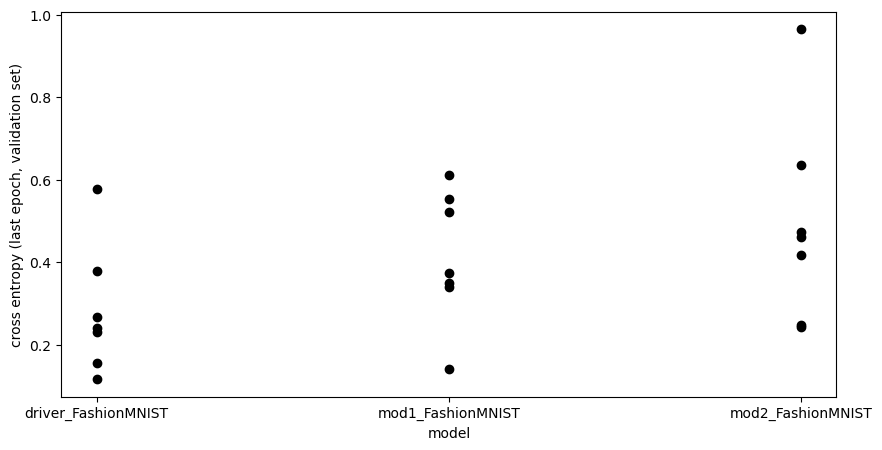

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
models_plotted = []
models_plotted_idx = 0
for _, (model_name, model_results) in enumerate(results.items()):
    if model_name in model_plot_list:
        models_plotted.append(model_name)
        models_plotted_idx += 1
        losses = model_results["val_losses"][-1]
        for point in losses:
            ax.scatter(models_plotted_idx, point, c="k")
ax.set_xticks(range(1, len(models_plotted)+1), models_plotted)
ax.set_ylabel("cross entropy (last epoch, validation set)")
ax.set_xlabel("model")
# ax.set_ylim(0, 0.2)

Learning curves

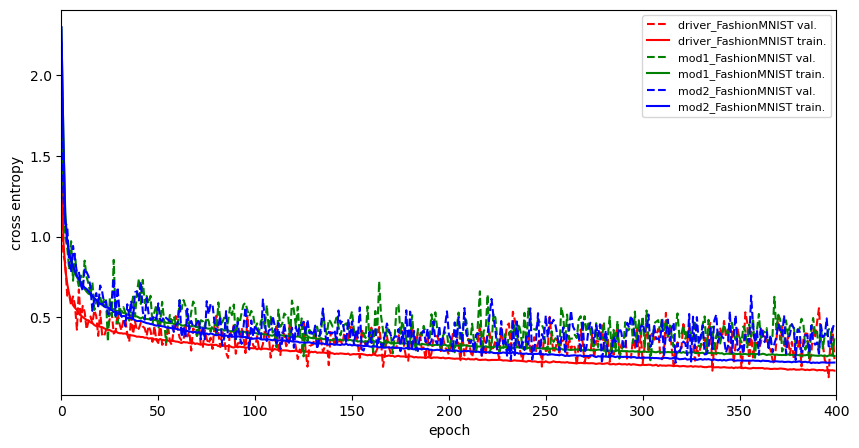

In [12]:
n_epochs = len(results[model_plot_list[0]]["val_losses"])
colours = ["r", "g", "b"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
models_plotted = []
models_plotted_idx = 0
for _, (model_name, model_results) in enumerate(results.items()):
    if model_name in model_plot_list:
        models_plotted.append(model_name)
        models_plotted_idx += 1

        n_epochs = len(model_results["val_losses"])

        ax.plot(np.arange(n_epochs), np.median(np.array(model_results["val_losses"]), axis=-1), ls="--", label=f"{model_name} val.", c=colours[models_plotted_idx-1])
        ax.plot(np.arange(n_epochs), np.median(np.array(model_results["train_losses"]), axis=-1), ls="-", label=f"{model_name} train.", c=colours[models_plotted_idx-1])

# ax.set_xticks(range(1, len(models_plotted)+1), models_plotted)
ax.set_ylabel("cross entropy")
ax.set_xlabel("epoch")
ax.set_xlim(0, n_epochs)
ax.legend(fontsize=8)
# ax.set_ylim(0, 0.2)